In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


# Menampilkan Infromasi Umum dan Statistik Deskriptif

In [4]:
df.info()
df.describe()
df['Survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: count, dtype: int64

# Visualisasi Univariat Age, Fare dan Survived

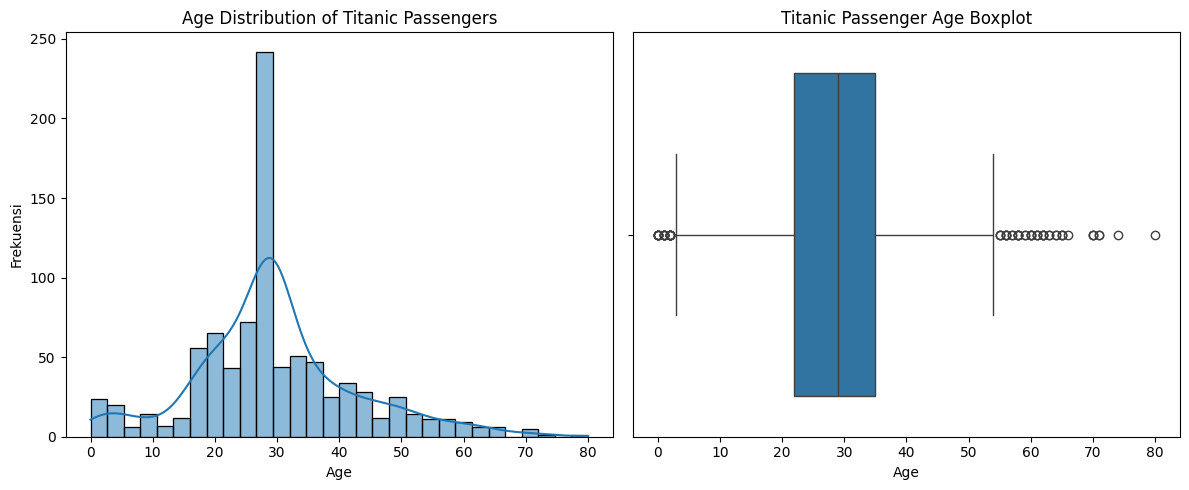

In [5]:
# Visualisasi univariat untuk fitur 'age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Titanic Passenger Age Boxplot')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

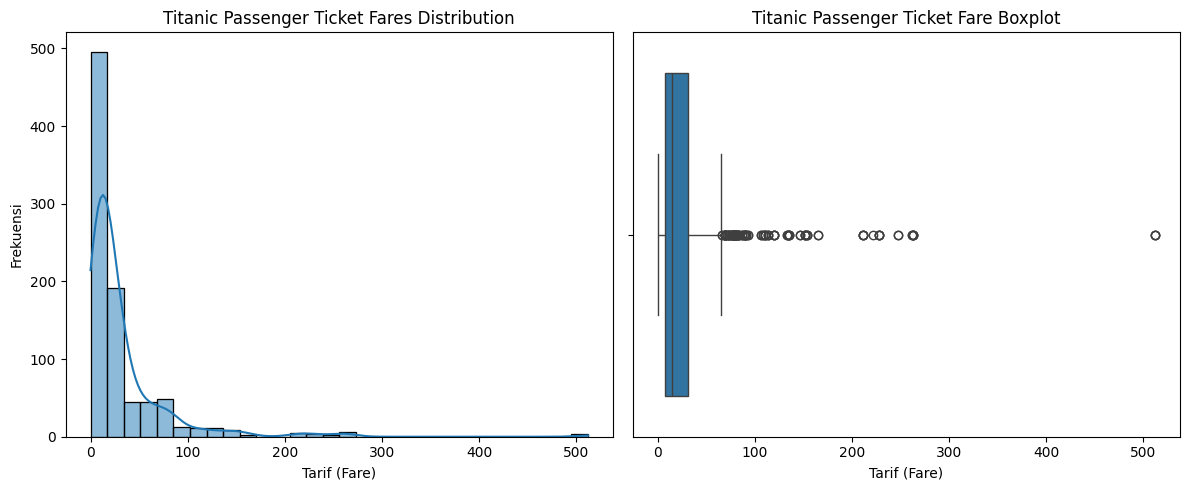

In [6]:
# Visualisasi univariat untuk fitur 'fare'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Titanic Passenger Ticket Fares Distribution')
plt.xlabel('Tarif (Fare)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Titanic Passenger Ticket Fare Boxplot')
plt.xlabel('Tarif (Fare)')

plt.tight_layout()
plt.show()

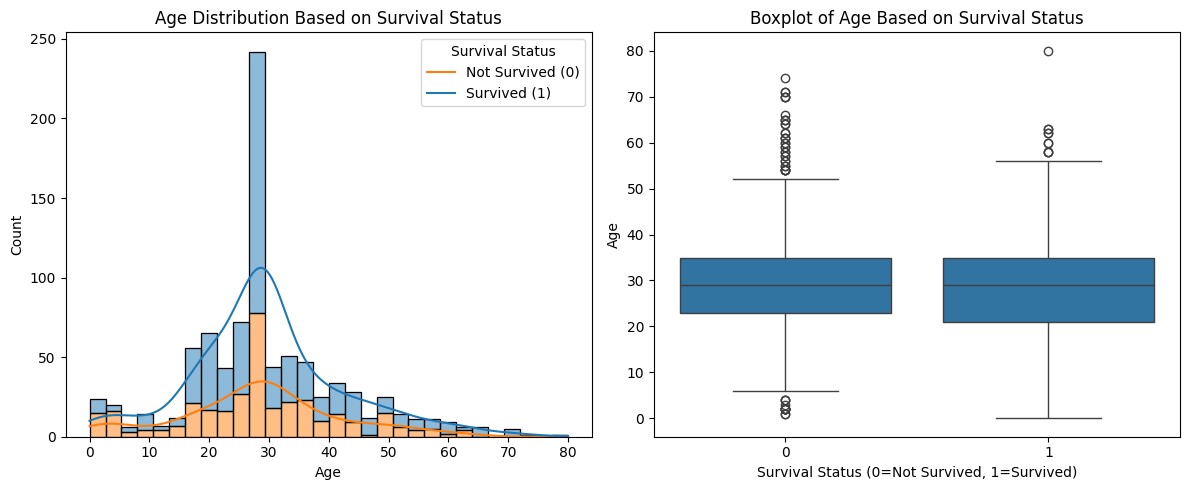

In [7]:
# Histogram Age berdasarkan Survived
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Age Distribution Based on Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'])

# Boxplot Age berdasarkan Survived
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Boxplot of Age Based on Survival Status')
plt.xlabel('Survival Status (0=Not Survived, 1=Survived)')

plt.tight_layout()
plt.show()

# Correlation Between Numeric Features

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033741 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.067809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.335071  0.083081  0.018443   
Age             0.033741 -0.067809 -0.335071  1.000000 -0.232743 -0.176744   
SibSp          -0.057527 -0.035322  0.083081 -0.232743  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.176744  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.093856  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.093856  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


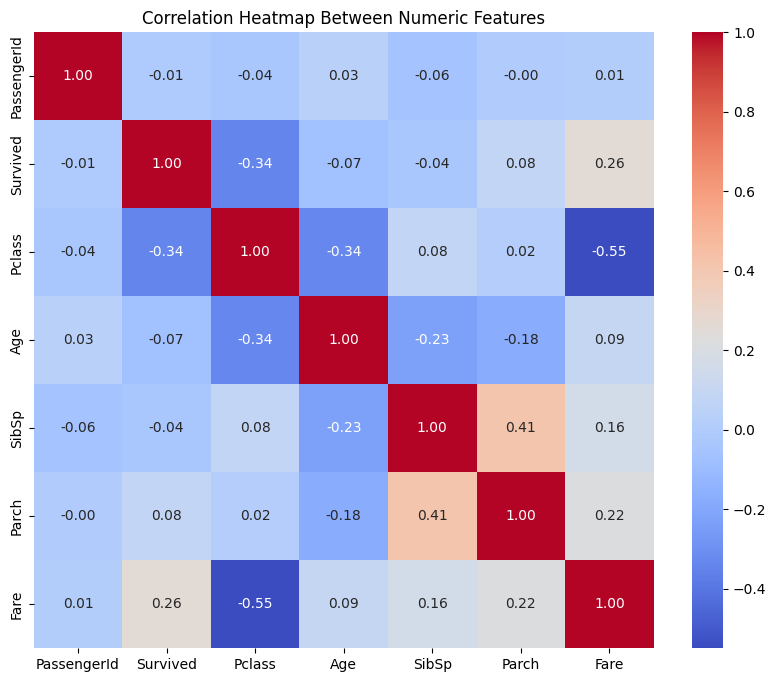

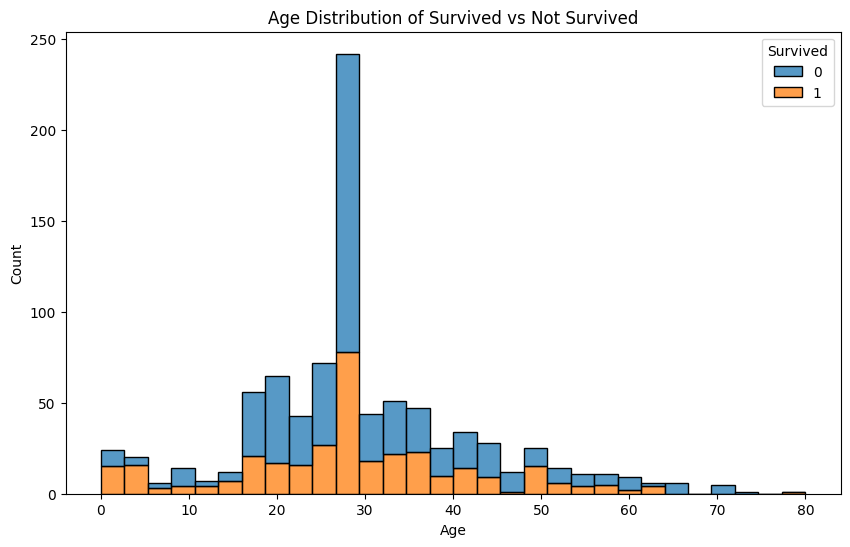

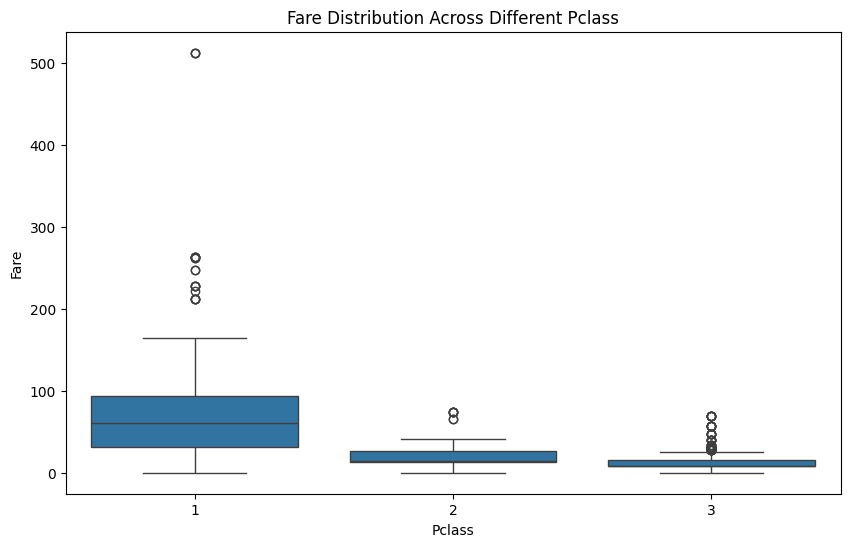

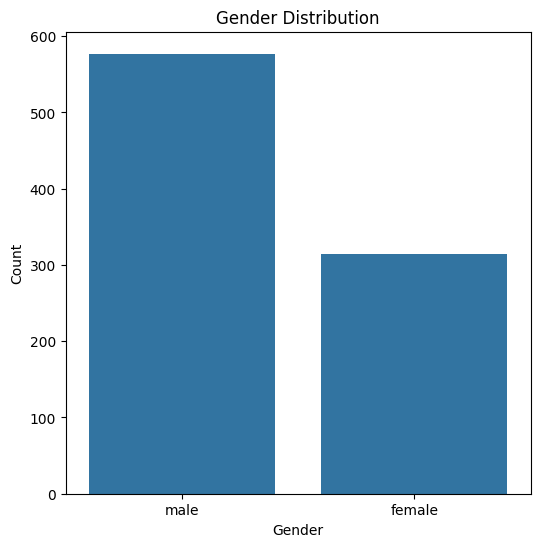

In [8]:
# 1) Display correlation among numeric features
corr = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr)

# Visualize the correlation matrix using a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Between Numeric Features')
plt.show()

# 2) Insights from EDA
# Insight 1: Age patterns of passengers who survived vs those who did not survive
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution of Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Insight 2: Relationship between cabin class (Pclass) and fare
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution Across Different Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Insight 3: Distribution or imbalance of gender
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Insight dari hasil EDA

1. Pola Usia Penumpang yang Selamat vs Tidak Selamat
   - Dari visualisasi boxplot dan histogram usia, terlihat bahwa penumpang yang selamat cenderung memiliki usia lebih muda dibandingkan dengan yang tidak selamat.
   - Anak-anak dan dewasa muda memiliki peluang bertahan hidup lebih tinggi, sedangkan penumpang berusia lanjut cenderung memiliki tingkat kelangsungan hidup lebih rendah.
2. Hubungan antara Kelas Kabin (Pclass) dan Tarif (Fare)
   - Visualisasi boxplot menunjukkan bahwa tarif tiket sangat dipengaruhi oleh kelas kabin. Penumpang di kelas 1 membayar tarif jauh lebih mahal dibandingkan kelas 2 dan kelas 3.
   - Hal ini mencerminkan perbedaan status sosial ekonomi penumpang, dimana kelas kabin atas mendapatkan fasilitas premium dengan harga tiket tinggi.
3. Distribusi Umur atau Ketimpangan Gender
   - Distribusi umur menunjukkan variasi usia cukup luas mulai dari bayi hingga lansia, namun mayoritas berada di rentang usia dewasa muda hingga paruh baya.
   - Dari countplot gender terlihat ketimpangan jumlah jenis kelamin dimana laki-laki lebih banyak daripada perempuan dalam dataset ini. Ini penting karena faktor gender juga mempengaruhi tingkat keselamatan selama tragedi Titanic.